# Visualize House Sales Data

Let's use pandas and matplotlib to help us to visualize sales data.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print('Spark UI running on http://YOURIPADDRESS:' + sc.uiWebUrl.split(':')[2])

## Read and Display data

In [1]:
house_prices = spark.read.csv("/data/house-prices/house-sales-simplified.csv", header=True, inferSchema=True)
house_prices.show(10)

+---+-------+---------+----------+-------------+--------+---------+-------------+-------+-------+
| ID|   Date|SalePrice|PropertyID| PropertyType|Bedrooms|Bathrooms|SqFtTotLiving|SqFtLot|YrBuilt|
+---+-------+---------+----------+-------------+--------+---------+-------------+-------+-------+
|  1|9/16/14|   280000|   1000102|    Multiplex|       6|      3.0|         2400|   9373|   1991|
|  2|6/16/06|  1000000|   1200013|Single Family|       4|     3.75|         3764|  20156|   2005|
|  3|1/29/07|   745000|   1200019|Single Family|       4|     1.75|         2060|  26036|   1947|
|  4|2/25/08|   425000|   2800016|Single Family|       5|     3.75|         3200|   8618|   1966|
|  5|3/29/13|   240000|   2800024|Single Family|       4|     1.75|         1720|   8620|   1948|
|  6|3/30/09|   349900|   3600090|    Townhouse|       2|      1.5|          930|   1012|   2008|
|  7|8/28/13|   327500|   3800004|Single Family|       3|      1.5|         1750|  34465|   1961|
|  8|5/24/07|   3470

## 'Summary' of data

In [2]:
house_prices.describe().show()
# copy this output to a text editor to see



+-------+-----------------+------+-----------------+--------------------+------------+------------------+------------------+-----------------+------------------+------------------+
|summary|               ID|  Date|        SalePrice|          PropertyID|PropertyType|          Bedrooms|         Bathrooms|    SqFtTotLiving|           SqFtLot|           YrBuilt|
+-------+-----------------+------+-----------------+--------------------+------------+------------------+------------------+-----------------+------------------+------------------+
|  count|            27063| 27063|            27063|               27063|       27063|             27063|             27063|            27063|             27063|             27063|
|   mean|          13532.0|  null|511626.2031186491| 4.680324882081883E9|        null|  3.38015002032295|2.2555518604737097|2122.963160033995|10997.679747256401|1977.0868713742009|
| stddev|7812.559503773396|  null|342821.1687621066|2.8963509791501536E9|        null|0.8954474

## Histogram / Frequency Plot
Create a frequency table & histogram plot based on number of bedrooms

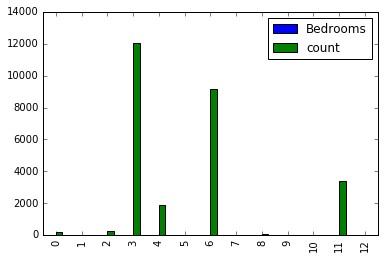

In [24]:
# TODO

freq_count = house_prices.groupBy('Bedrooms').count().toPandas()

freq_count.plot.bar()

## Create a BoxPlot on sale prices 
Sale prices per property type  (Single Family, Townhouse)

In [ ]:
# TODO



## Binplot
plot houses sold within these price ranges
< 250k,    250k-500k ,  500k-750k,  750k - 1M, 1M + 

Also create a boxplot for these price ranges

In [ ]:
# TODO

## Pie
Create a pie chart of houses solde in 2006, 2005, 2004

In [ ]:
## TODO

## Create a 3D plot !
Create a 3d plot of   SalePrice ~ SqFtTotLiving + SqFtLot

In [ ]:
# TODO

## Heat Map
We are going to see which months see lots of activity in housing market.
Produce a heat map of Month ~ number of transactions for that month

In [ ]:
# TODO

## Any other plots?
Look at [MatplotLib Examples](https://matplotlib.org/gallery.html).
If any of them inspire you try to create a graph like that!
And do show it off to the class  :-)